# SMAI Assignment - 2

## Question 3: Face Recognition using Principal Component Analysis

This question requires you to create a basic facial recognition system using a technique called principal component analysis (PCA)
by projecting the face images on the feature space (face space) which best
represents the variations among distinct faces. The face space is defined as the
“Eigenfaces", which are the eigenvectors of the set of faces.

The goal of implementing this system is to recognize a person's face by comparing it to a pre-existing database of faces, and identifying the closest match.

Link to paper on Eigenfaces: [https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf](https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf)

The AT&T face dataset contains a set of grayscale face images with dimensions 92x112. The images are organised in 40 directories (one for each subject), which have names of the form sX, where X indicates the subject number (between 1 and 40). In each of these directories, there are ten different images of that subject, which have names of the form Y.pgm, where Y is the image number for that subject (between 1 and 10). These 10 images per person are taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement). <b>Link:</b> [https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/](https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/)

#### Tasks
1. Load dataset and divide the date into training and test sets.
2. Implement the PCA algorithm from scratch.
3. Implement image reconstruction using the eigen projections and visualise differences for different number of components.
4. Visualise the mean(Eigen face) generated.
5. Given training set, obtain accuracy by attempting a face regonition module and obtaining the accuracy for different number of principal components.

#### Import Libraries

In [5]:
!unzip ATnT.zip

Archive:  ATnT.zip
   creating: ATnT/
  inflating: __MACOSX/._ATnT         
   creating: ATnT/s34/
  inflating: __MACOSX/ATnT/._s34     
   creating: ATnT/s33/
  inflating: __MACOSX/ATnT/._s33     
   creating: ATnT/s5/
  inflating: __MACOSX/ATnT/._s5      
   creating: ATnT/s2/
  inflating: __MACOSX/ATnT/._s2      
   creating: ATnT/s32/
  inflating: __MACOSX/ATnT/._s32     
   creating: ATnT/s35/
  inflating: __MACOSX/ATnT/._s35     
   creating: ATnT/s3/
  inflating: __MACOSX/ATnT/._s3      
   creating: ATnT/s4/
  inflating: __MACOSX/ATnT/._s4      
   creating: ATnT/s26/
  inflating: __MACOSX/ATnT/._s26     
   creating: ATnT/s19/
  inflating: __MACOSX/ATnT/._s19     
   creating: ATnT/s21/
  inflating: __MACOSX/ATnT/._s21     
   creating: ATnT/s17/
  inflating: __MACOSX/ATnT/._s17     
   creating: ATnT/s28/
  inflating: __MACOSX/ATnT/._s28     
   creating: ATnT/s10/
  inflating: __MACOSX/ATnT/._s10     
   creating: ATnT/s11/
  inflating: __MACOSX/ATnT/._s11     
   creating: 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
import cv2
from copy import copy
from tqdm import tqdm

#### Import Dataset
Assign labels for the images based on the subdirectories to obtain X(images array) and y (labels).

Ensure that the test data contains atleast one image from each category.

In [7]:
trainAmt = 0.9
allFaces = []
labels = []

for i in range(1,41):
    for j in range(1,11):
        imgPath = os.path.join("ATnT", "s" + str(i), str(j) + ".pgm")
        img = cv2.imread(imgPath, -1)

        allFaces.append(img)
        labels.append(i)

randomOrder = np.random.permutation(len(labels))
allFaces = np.array(allFaces)[randomOrder]
labels = np.array(labels)[randomOrder]

trainFaces = allFaces[:int(trainAmt*len(allFaces))]
trainLabels = labels[:int(trainAmt*len(allFaces))]

testFaces = allFaces[int(trainAmt*len(allFaces)): ]
testLabels = labels[int(trainAmt*len(allFaces)): ]

print(trainFaces.shape, trainLabels.shape)

(360, 112, 92) (360,)


#### Implement PCA Algorithm.

Explain your steps with comments and write a brief explanation of the method.

In [8]:
def principalComponentAnalysis(X, numComponents):
    X_flat = X.reshape(X.shape[0], -1)
    mean_face = np.mean(X_flat, axis=0)
    centered_data = X_flat - mean_face
    cov_matrix = np.cov(centered_data, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    eigenfaces = sorted_eigenvectors[:, :numComponents]
    return eigenfaces

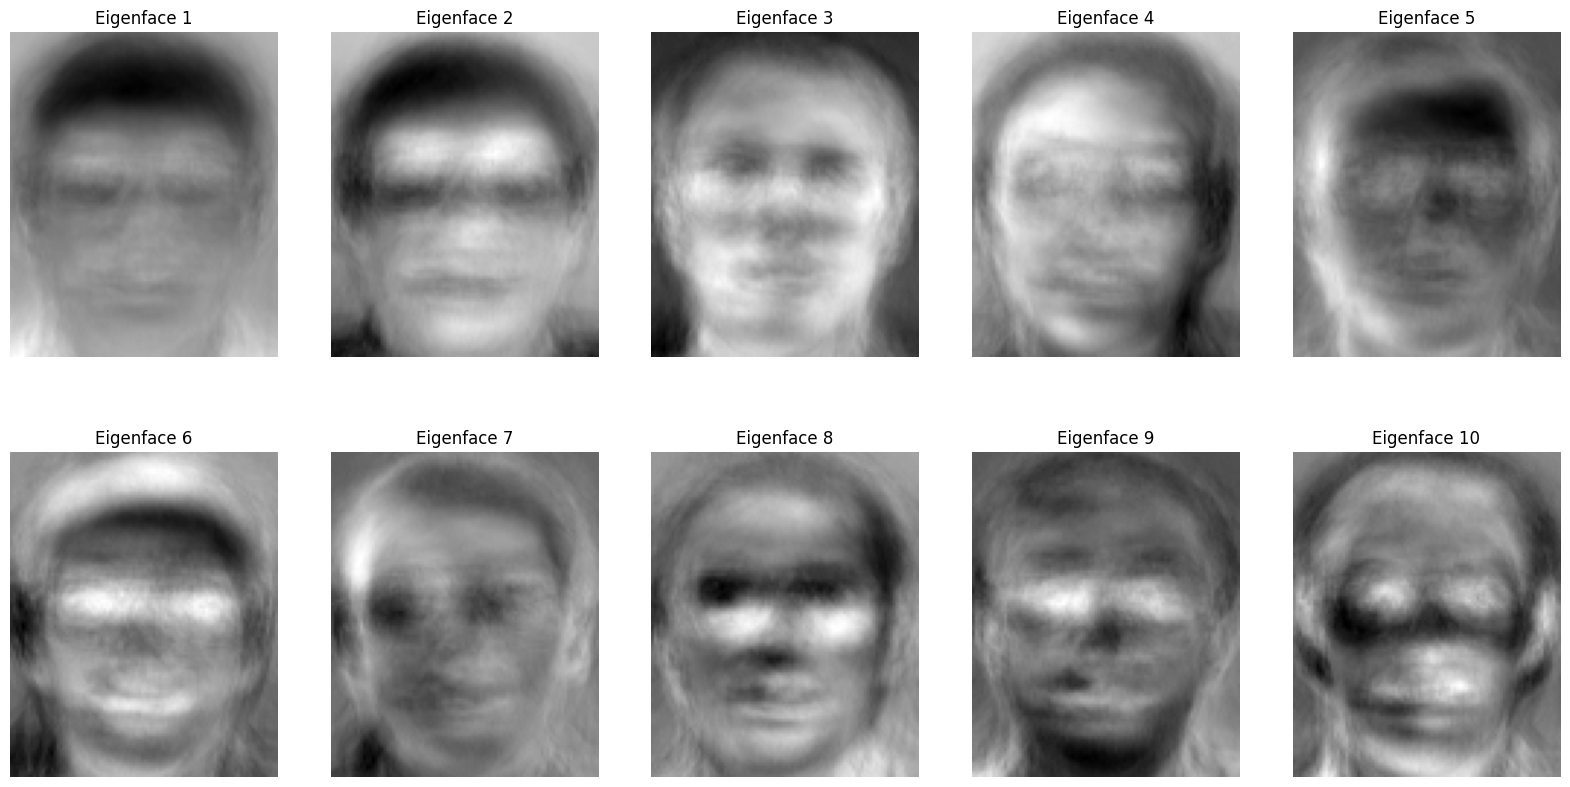

In [9]:
%matplotlib inline
num_components = 100
eigenfaces = principalComponentAnalysis(trainFaces, num_components)
plt.figure(figsize=(20, 10))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(eigenfaces[:, i].reshape(112, 92), cmap='gray')
    plt.title(f'Eigenface {i+1}')
    plt.axis('off')
plt.show()

In [16]:
eigenfaces.shape

(10304, 100)

#### Implement Image Reconstruction from Eigenfaces


Explain your steps with comments and write a brief explanation of the method.

In [ ]:
def imageReconstruction(testFace, eigenFaces, meanFace):
    testFace_flat = testFace.reshape(-1, 1)
    centered_testFace = testFace_flat - meanFace.reshape(-1, 1)
    eigenCoefficients = np.dot(eigenFaces.T, centered_testFace)
    reconstructedFace_flat = np.dot(eigenFaces, eigenCoefficients)
    reconstructedFace_flat += meanFace.reshape(-1, 1)
    reconstructedFace = reconstructedFace_flat.reshape(testFace.shape)
    return reconstructedFace

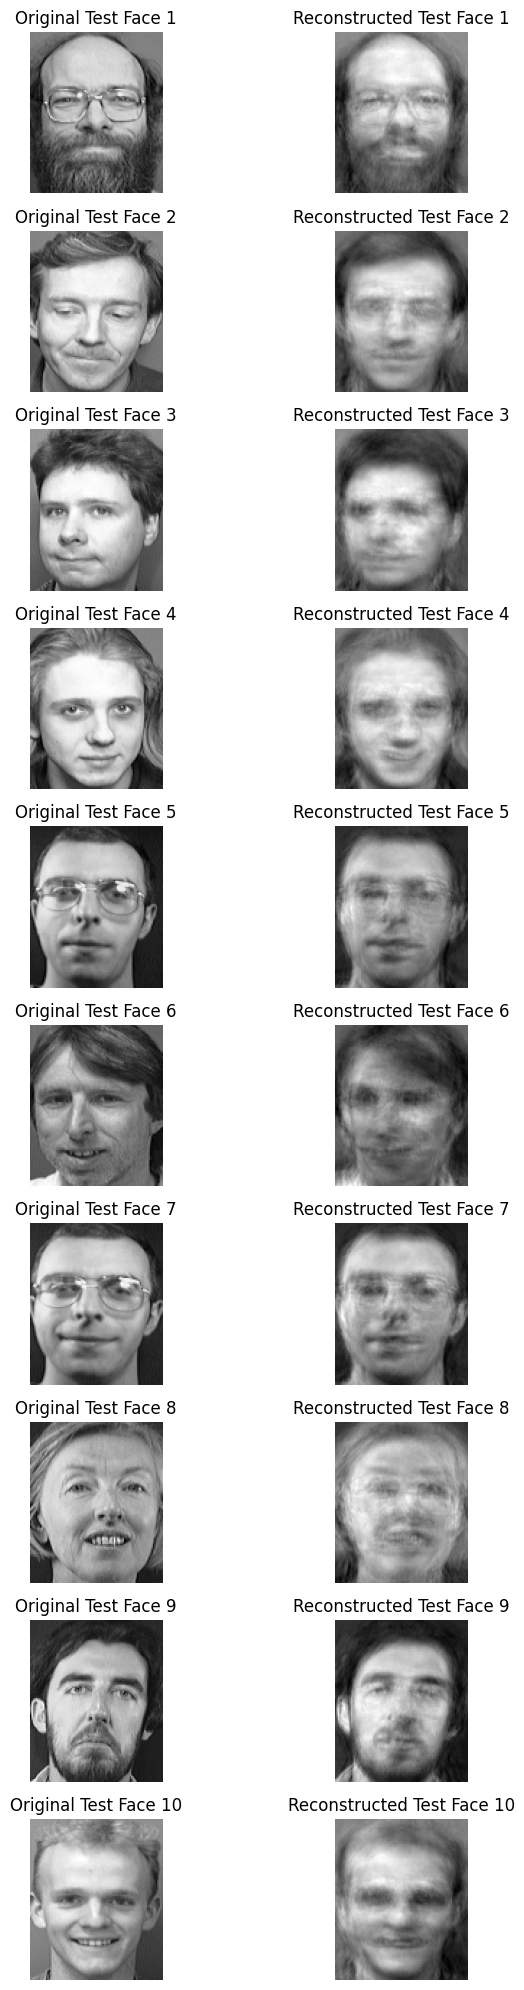

In [ ]:
%matplotlib inline
num_test_faces = 10

plt.figure(figsize=(8, 20))
for i in range(num_test_faces):
    reconstructed_face = imageReconstruction(testFaces[i], eigenfaces, np.mean(trainFaces, axis=0))
    plt.subplot(num_test_faces, 2, 2*i + 1)
    plt.imshow(testFaces[i], cmap='gray')
    plt.title(f'Original Test Face {i+1}')
    plt.axis('off')
    plt.subplot(num_test_faces, 2, 2*i + 2)
    plt.imshow(reconstructed_face, cmap='gray')
    plt.title(f'Reconstructed Test Face {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

#### Visualisation
Visualise the results for different number of factors(pc = 5, 10, 50, 100, etc.)

**Note:** Ensure that the images are labelled appropriately.

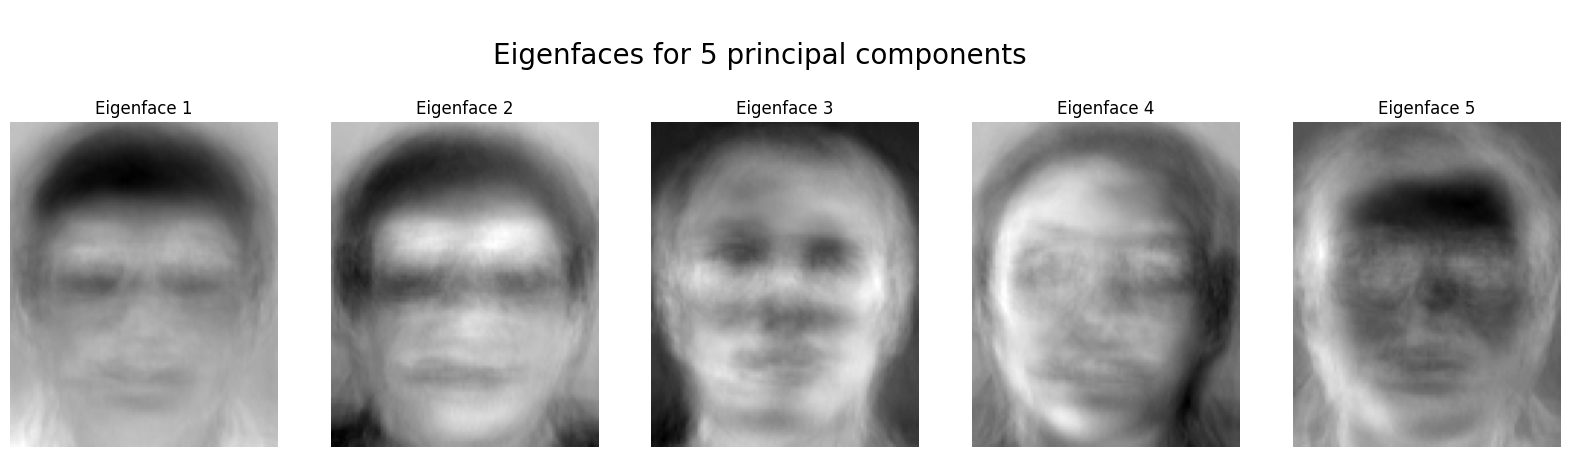

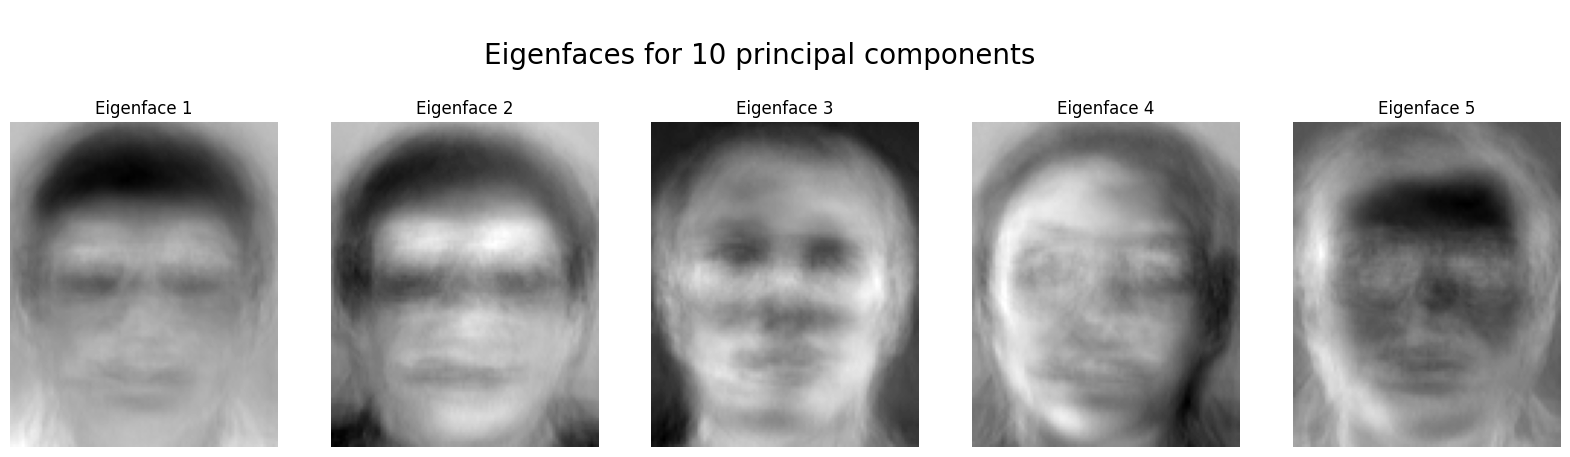

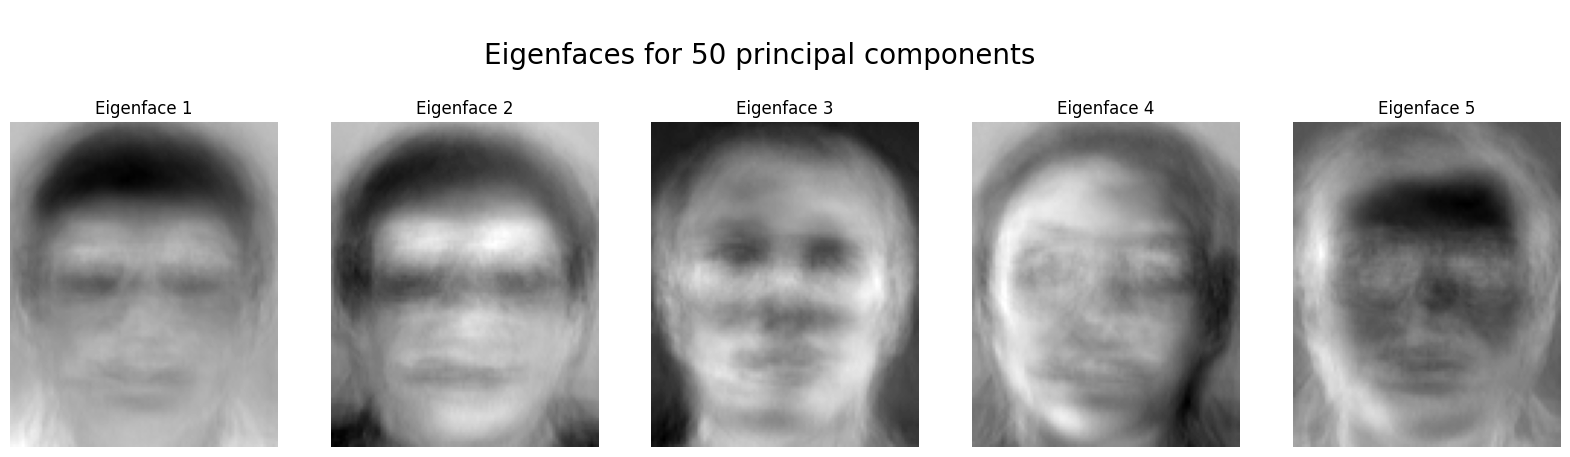

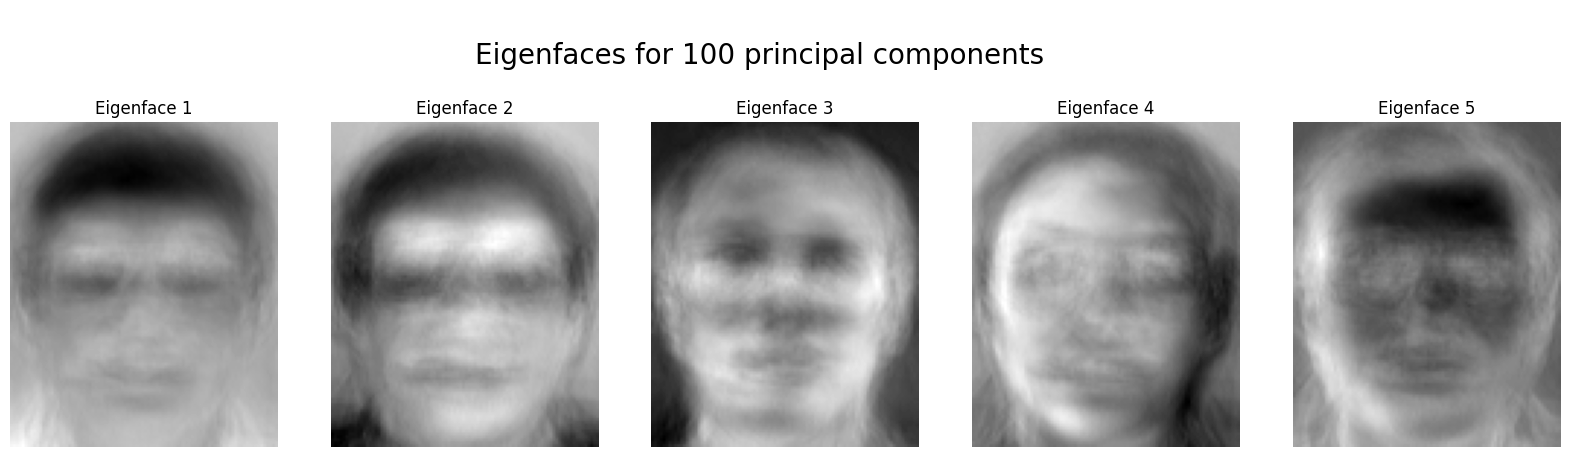

In [ ]:
%matplotlib inline

def displayNfactors(trainFaces, num_factors_list):

    for num_components in num_factors_list:
        eigenfaces = principalComponentAnalysis(trainFaces, num_components)
        plt.figure(figsize=(20, 10))
        for i in range(5):
            plt.subplot(2, 5, i + 1)
            plt.imshow(eigenfaces[:, i].reshape(112, 92), cmap='gray')
            plt.title(f'Eigenface {i+1}')
            plt.axis('off')
        plt.suptitle(f'\nEigenfaces for {num_components} principal components', fontsize=20)
        plt.show()

num_factors_list = [5, 10, 50, 100]

displayNfactors(trainFaces, num_factors_list)

#### Implement face recognition module based on the norm
Explain your steps with comments and write a brief explanation of the method.

*   Test the module and report accuracies based on the number of components taken for a range of value and plot them.
*   Also plot the mean square error vs the number of eigenvectors taken and report your observations.
*   For further empirical analysis, plot the semi-log variant of the error plot obtained above.

In [17]:
def getClass(test_image, eigenfaces, mean_face, X_train, y_train):

    min_error = float('inf')
    best_match = None
    predicted_class = None

    test_image_flat = test_image.reshape(-1, 1)
    centered_test_image = test_image_flat - mean_face.reshape(-1, 1)
    eigen_coefficients = np.dot(eigenfaces.T, centered_test_image)
    reconstructed_image_flat = np.dot(eigenfaces, eigen_coefficients)
    reconstructed_image_flat += mean_face.reshape(-1, 1)

    for i in range(len(X_train)):
        train_image_flat = X_train[i].reshape(-1, 1)
        error = np.linalg.norm(reconstructed_image_flat - train_image_flat)
        if error < min_error:
            min_error = error
            best_match = X_train[i]
            predicted_class = y_train[i]

    return best_match, min_error, predicted_class

Iterate through all the images in the test data and test the accuracy by taking different number of components

In [ ]:
components = [3,5,10,20,30,40,50]
mse = []
accuracies = []

for numComponents in components:
    correct_predictions = 0
    total_samples = len(testFaces)

    for i in range(total_samples):
        test_image = testFaces[i]
        true_label = testLabels[i]

        best_match, _, predicted_class = getClass(test_image, eigenfaces[:, :numComponents], np.mean(trainFaces, axis=0), trainFaces, trainLabels)

        if predicted_class == true_label:
            correct_predictions += 1

    accuracy = correct_predictions / total_samples
    accuracies.append(accuracy)

    mse_sum = 0
    for i in range(total_samples):
        test_image = testFaces[i]
        true_label = testLabels[i]

        best_match, min_error, _ = getClass(test_image, eigenfaces[:, :numComponents], np.mean(trainFaces, axis=0), trainFaces, trainLabels)

        mse_sum += min_error ** 2

    mean_squared_error = mse_sum / total_samples
    mse.append(mean_squared_error)

    print(f"Accuracy for {numComponents} principle components : {accuracy}")


Accuracy for 3 principle components : 0.325
Accuracy for 5 principle components : 0.625
Accuracy for 10 principle components : 0.9
Accuracy for 20 principle components : 0.95
Accuracy for 30 principle components : 0.95
Accuracy for 40 principle components : 0.95
Accuracy for 50 principle components : 0.95


Plot Number of eigenvectors vs Mean Square Error

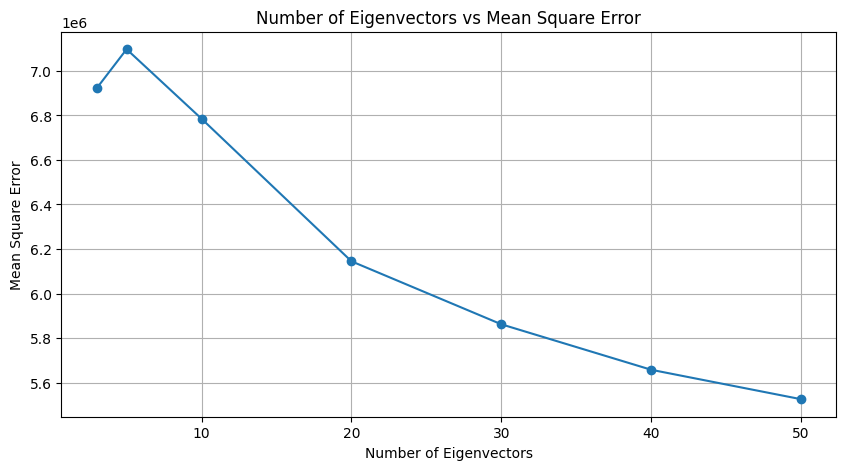

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(components, mse, marker='o')
plt.title('Number of Eigenvectors vs Mean Square Error')
plt.xlabel('Number of Eigenvectors')
plt.ylabel('Mean Square Error')
plt.grid(True)
plt.show()

Plot Number of eigenvectors vs Logarithmic Mean Square Error

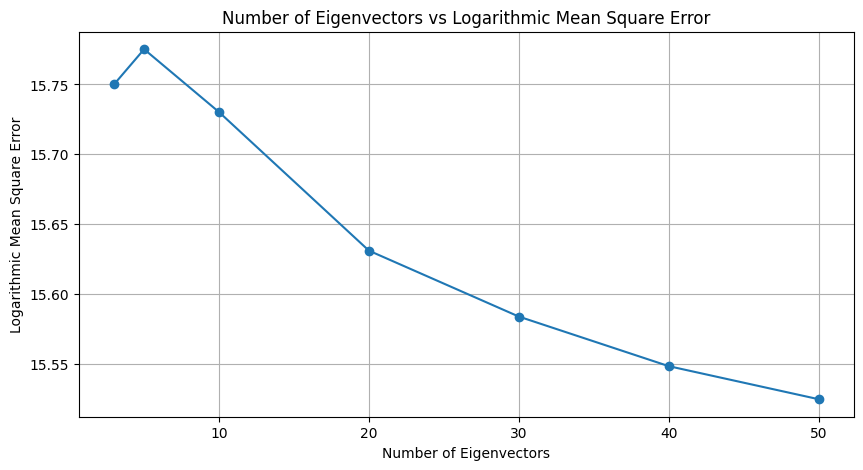

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(components, np.log(mse), marker='o')
plt.title('Number of Eigenvectors vs Logarithmic Mean Square Error')
plt.xlabel('Number of Eigenvectors')
plt.ylabel('Logarithmic Mean Square Error')
plt.grid(True)
plt.show()